# MultiFeature Beat Tracking (Information Gain) using Essentia
This is and example of the Multifeature Beat tracker implemented in [Essentia](http://essentia.upf.edu), the Matlab version is in this link: [https://github.com/JoseRZapata/MultiFeatureBeatTracking](https://github.com/JoseRZapata/MultiFeatureBeatTracking)

References:
- ** "Multi-Feature Beat Tracking" **, Jose R. Zapata, Matthew E.P. Davies, Emilia Gómez.  IEEE/ACM Transactions on Audio, Speech, and Language Processing, Vol. 22, No. 4, P. 816-825, 2014. [https://doi.org/10.1109/TASLP.2014.2305252](https://doi.org/10.1109/TASLP.2014.2305252)


- **"Comparative evaluation and combination of automatic rhythm description systems" **. Zapata, Jose R. (2013).  Ph.D. thesis, Universitat Pompeu Fabra, Barcelona, Spain, 2013.
[https://joserzapata.github.io/#phdthesis](https://joserzapata.github.io/#phdthesis)


- ** "Essentia: An Audio Analysis Library for Music Information Retrieval" ** ,Dmitry Bogdanov, Nicolas Wack, Emilia Gómez, Sankalp Gulati, Perfecto Herrera, Oscar Mayor, Gerard Roma, Justin Salamon, Jose R. Zapata, Xavier Serra. . 14th International Society for Music Information Retrieval Conference (ISMIR 2013), P. 493-498, Curitiba, Brazil, 2013. [Essentia](http://essentia.upf.edu)

In [10]:
# Libraries
import essentia
from essentia.standard import *
import IPython.display as ipd #Ipython functions for jupyter
import numpy as np
import matplotlib.pyplot as plt #Ploting library
from __future__ import print_function, division
%matplotlib inline
plt.style.use('ggplot') #plot style

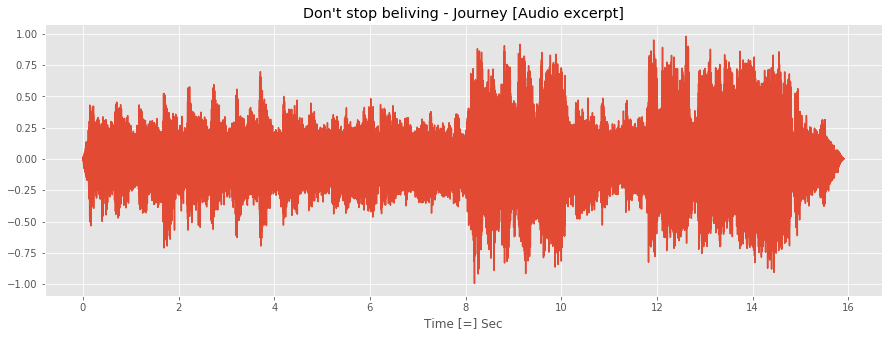

In [11]:
#Loading audio File with essentia
audiobeat = MonoLoader(filename='Data/Journey.wav')() #15 sec extract from -> Journey - Dont stop beliving 
#Plot audio waveform
plt.rcParams['figure.figsize'] = (15, 5) # set plot size
plt.plot((np.arange(0, len(audiobeat), 1)/ 44100),audiobeat)#x axis in seconds
plt.title("Don't stop beliving - Journey [Audio excerpt]")
plt.xlabel("Time [=] Sec")
ipd.Audio('Data/Journey.wav')# play audio directly in a Jupyter notebook

In [13]:
# Compute beat positions and BPM
# with the multifeature Beat tracker implemented in essentia
rhythm_extractor = RhythmExtractor2013(method="multifeature")
bpm, beats, b_conf, _, _ = rhythm_extractor(audiobeat)

print("BPM:", bpm)
print("Beat positions (sec.):", beats) # Beat positions in seconds
print("Beat estimation confidence:", b_conf)
# Beat estimation confidence values = 
#[0, 1) -> very low confidence, the input signal is hard for the employed candidate beat trackers
#[1, 1.5] -> low confidence
#(1.5, 3.5] -> good confidence, accuracy around 80% in AMLt measure
#(3.5, 5.32] -> excellent confidence

BPM: 118.452629089
Beat positions (sec.): [ 0.5456689  1.1261678  1.6718367  2.1594558  2.6702948  3.1695237
  3.6687527  4.1679816  4.6904306  5.1896596  5.6888885  6.199728
  6.710567   7.221406   7.732245   8.243084   8.777143   9.287982
  9.7988205 10.28644   10.797278  11.331338  11.830566  12.329796
 12.840634  13.351474  13.862312  14.361542  14.860771  15.39483  ]
Beat estimation confidence: 2.4355006218


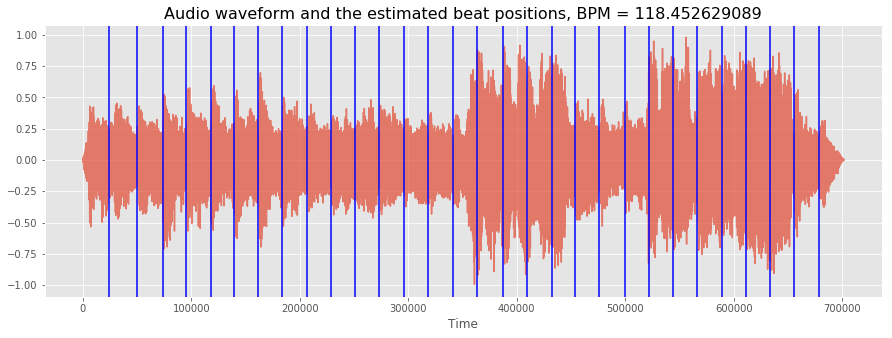

In [18]:
# Mark beat positions on the audio
# Let's use beeps instead of white noise to mark them, as it's more distinctive
marker = AudioOnsetsMarker(onsets=beats, type='beep')
marked_audio = marker(audiobeat)

plt.plot(audiobeat,alpha=0.7) 
for beat in beats:
    # add beat times to the audio waveform plot
    plt.axvline(x=beat*44100, color='blue')
plt.title("Audio waveform and the estimated beat positions, BPM = {}".format(bpm),size=16);
plt.xlabel('Time');

ipd.Audio(marked_audio,rate=44100) # thast's all folks =) 